In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [96]:
def RSE(pred, true):
    return np.sqrt(np.sum((true-pred)**2)) / np.sqrt(np.sum((true-true.mean())**2))

def CORR(pred, true):
    u = ((true-true.mean(0))*(pred-pred.mean(0))).sum(0)
    d = np.sqrt(((true-true.mean(0))**2*(pred-pred.mean(0))**2).sum(0))
    return (u/d).mean(-1)

def MAE(pred, true):
    return np.mean(np.abs(pred-true))

def MSE(pred, true):
    return np.mean((pred-true)**2)

def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))

def MAPE(pred, true):
    return np.mean(np.abs((pred - true) / true))

def MSPE(pred, true):
    return np.mean(np.square((pred - true) / true))

def metric(pred, true):
    mae = MAE(pred, true)
    mse = MSE(pred, true)
    rmse = RMSE(pred, true)
    mape = MAPE(pred, true)
    mspe = MSPE(pred, true)

    return {
        "MAE": mae,
        "MSE" : mse,
        "RMSE" : rmse,
        "MAPE" : mape,
        "MSPE" : mspe
    }

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def analyze(directory):
  preds = np.load(f'{directory}/pred.npy')
  trues = np.load(f'{directory}/true.npy')

  metrics = metric(preds, trues)

  print(metrics)

  frame = 1

  for example in range(0, 10000, 2000):
    plt.figure()
    plt.plot(trues[example: example + frame,:,-1].flatten(), label='GroundTruth')
    plt.plot(preds[example:example + frame,:,-1].flatten(), label='Prediction')
    plt.legend()
    plt.show()

msp metrics:
{'MAE': 0.19080278, 'MSE': 0.068179354, 'RMSE': 0.26111177, 'MAPE': 1.2437811, 'MSPE': 62.26906}
msp nearby metrics:
{'MAE': 0.19370934, 'MSE': 0.06934954, 'RMSE': 0.263343, 'MAPE': 1.1519815, 'MSPE': 53.905064}


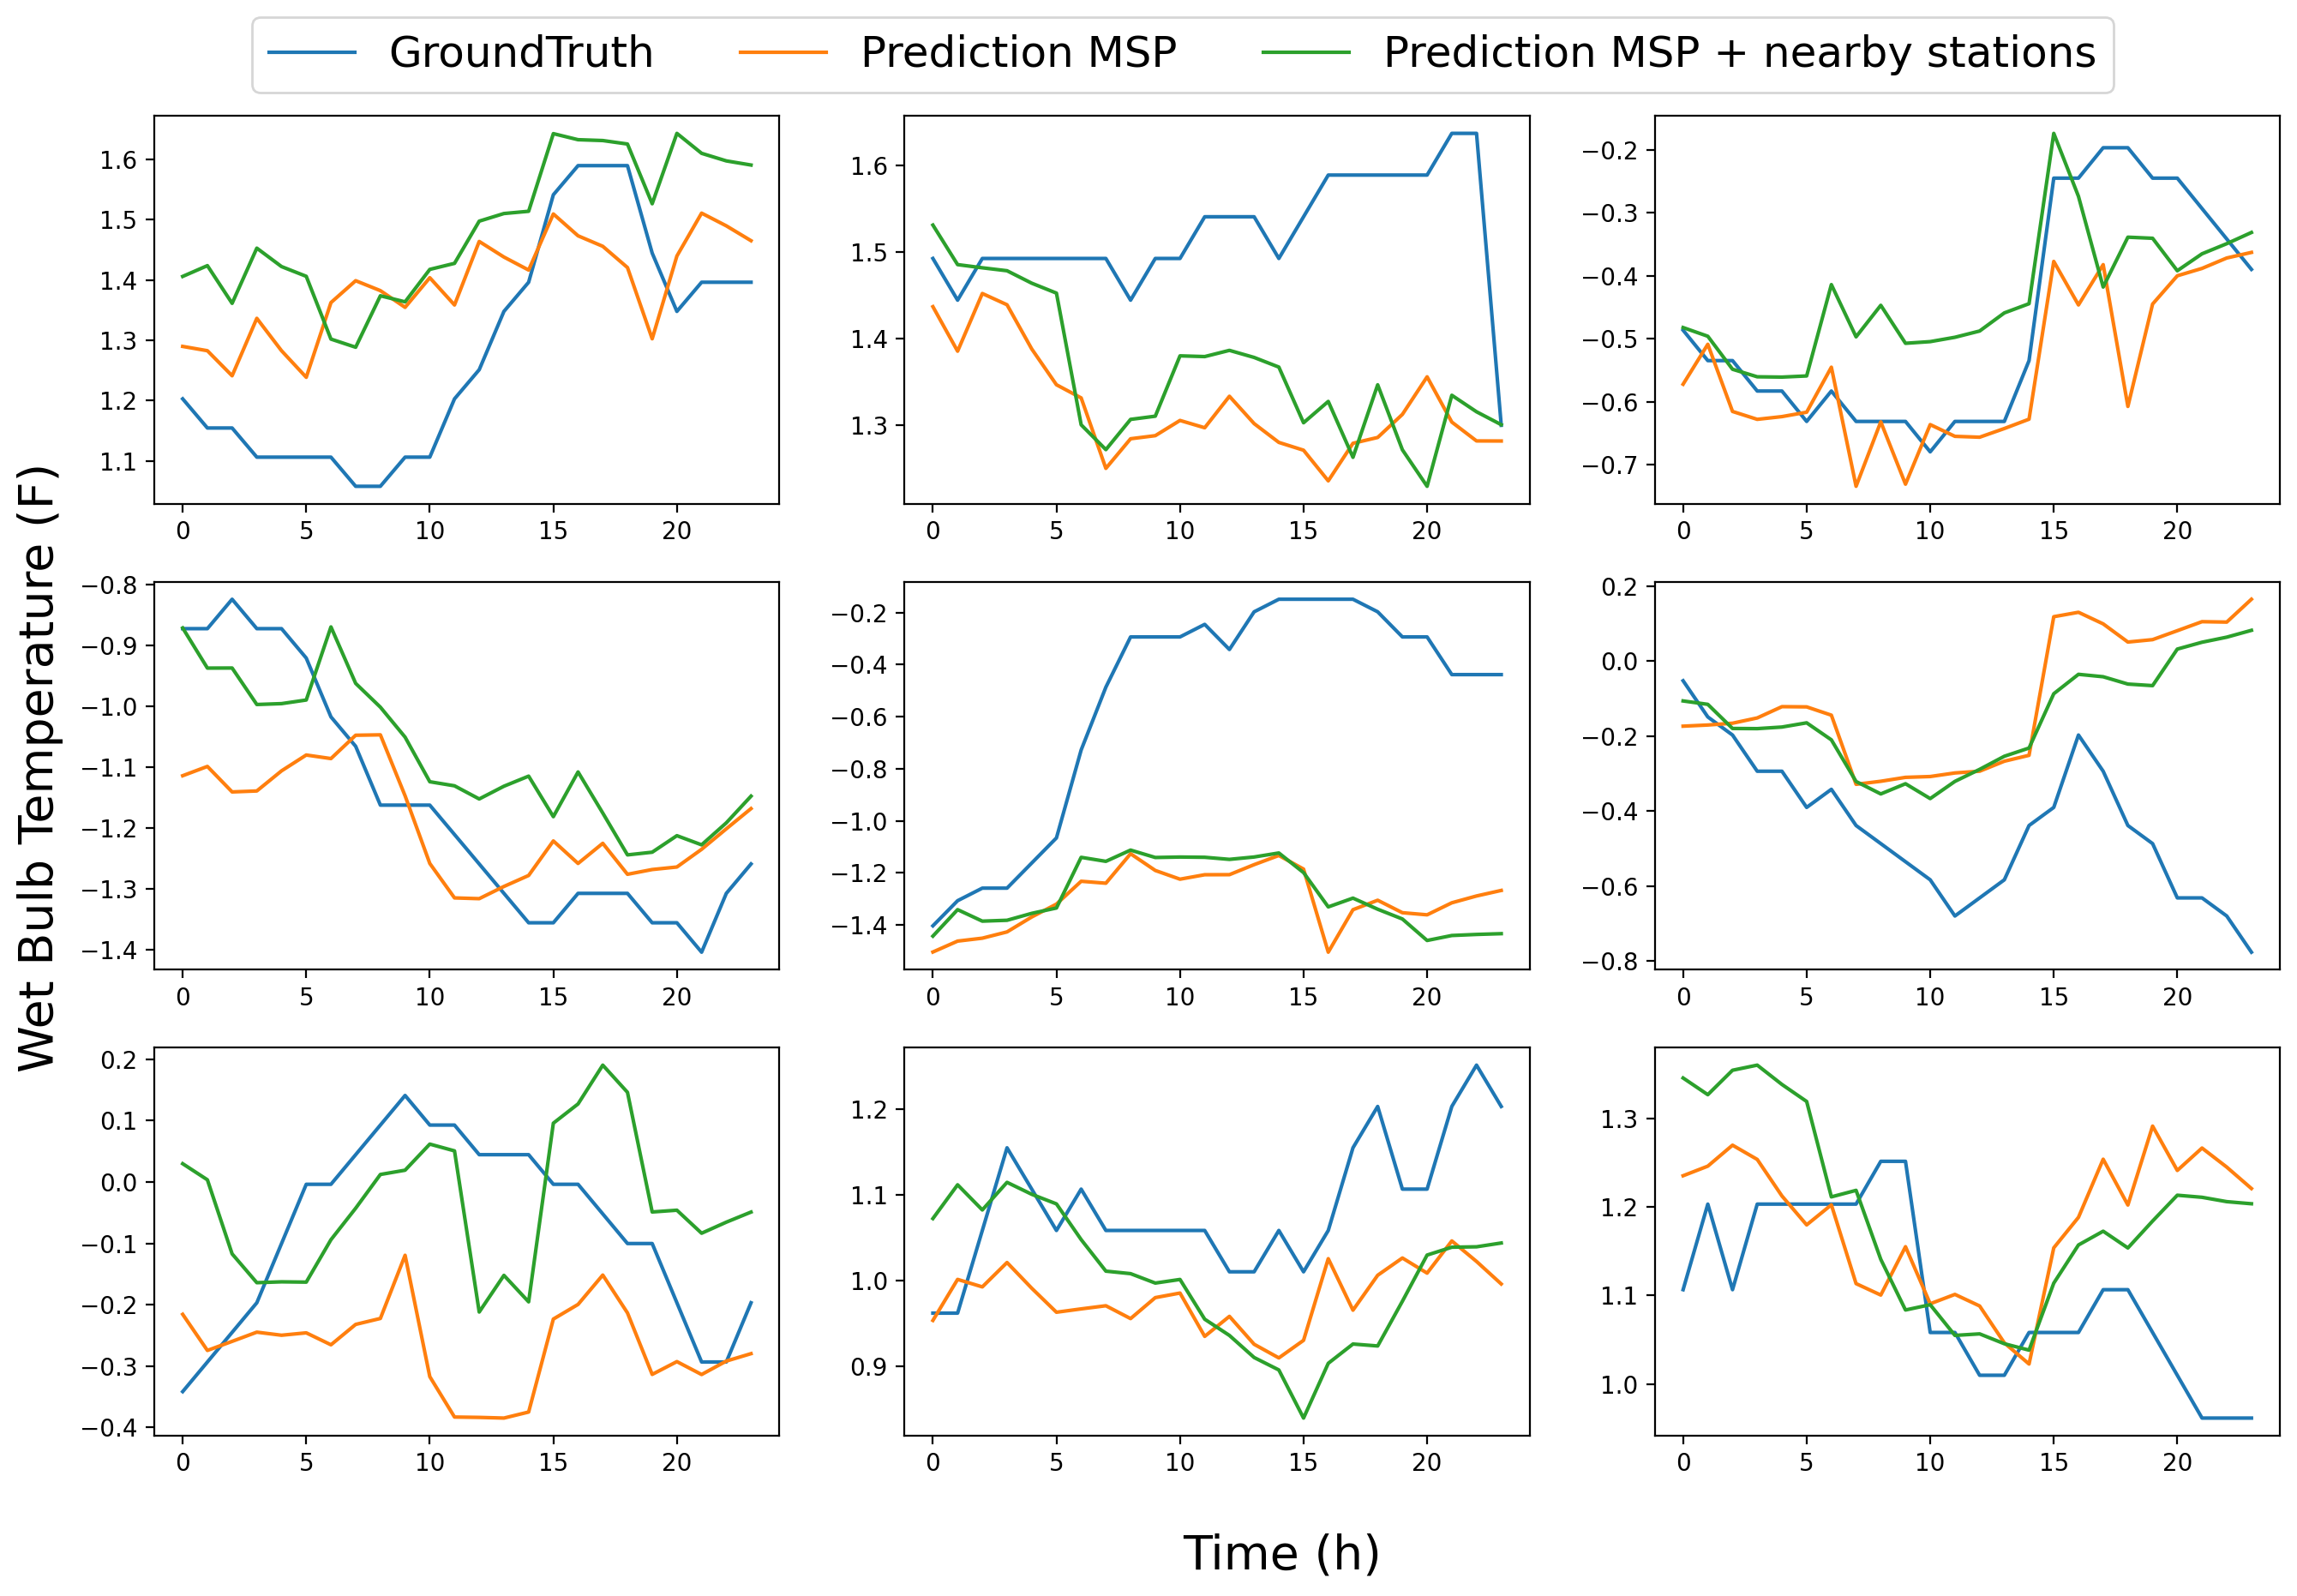

In [98]:
msp = "/content/drive/MyDrive/5527 project/msp_results/msp_same_timepoints_as_concat/results/MSP_sl96_ll48_pl24_wetbulb_MS"
msp_nearby = "/content/drive/MyDrive/5527 project/msp_results/nearby_concat/results/informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0"

preds_msp = np.load(f'{msp}/pred.npy')
preds_msp_nearby = np.load(f"{msp_nearby}/pred.npy")
trues = np.load(f'{msp}/true.npy')

print("msp metrics:")
msp_short = metric(preds_msp, trues)
print(msp_short)

print("msp nearby metrics:")
msp_nearby_short = metric(preds_msp_nearby, trues)
print(msp_nearby_short)

frame = 1

nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, dpi=200, figsize=(16, 10))

for i, example in enumerate(range(0, 9000, 1000)):
  ax = axs[i // ncols, i % ncols]
  ax.plot(trues[example: example + frame,:,-1].flatten(), label='GroundTruth')
  ax.plot(preds_msp[example:example + frame,:,-1].flatten(), label='Prediction MSP')
  ax.plot(preds_msp_nearby[example:example + frame,:,-1].flatten(), label='Prediction MSP + nearby stations')
  # ax.set_ylabel("Wetbulb Temperature")
  # ax.set_xlabel("Hours")
  # ax.legend()
  if i == 0:
    plt.figlegend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, 0.95), fontsize=18)

fig.text(0.075, 0.5, 'Wet Bulb Temperature (F)', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.04, 'Time (h)', va='center', rotation='horizontal', fontsize=20)

plt.savefig("/content/drive/MyDrive/5527 project/figures/short_term.pdf")
plt.show()

msp metrics:
{'MAE': 0.39998537, 'MSE': 0.29479808, 'RMSE': 0.54295313, 'MAPE': 2.0021462, 'MSPE': 162.70096}
msp nearby metrics:
{'MAE': 0.39255804, 'MSE': 0.28354976, 'RMSE': 0.5324939, 'MAPE': 2.094922, 'MSPE': 166.15823}


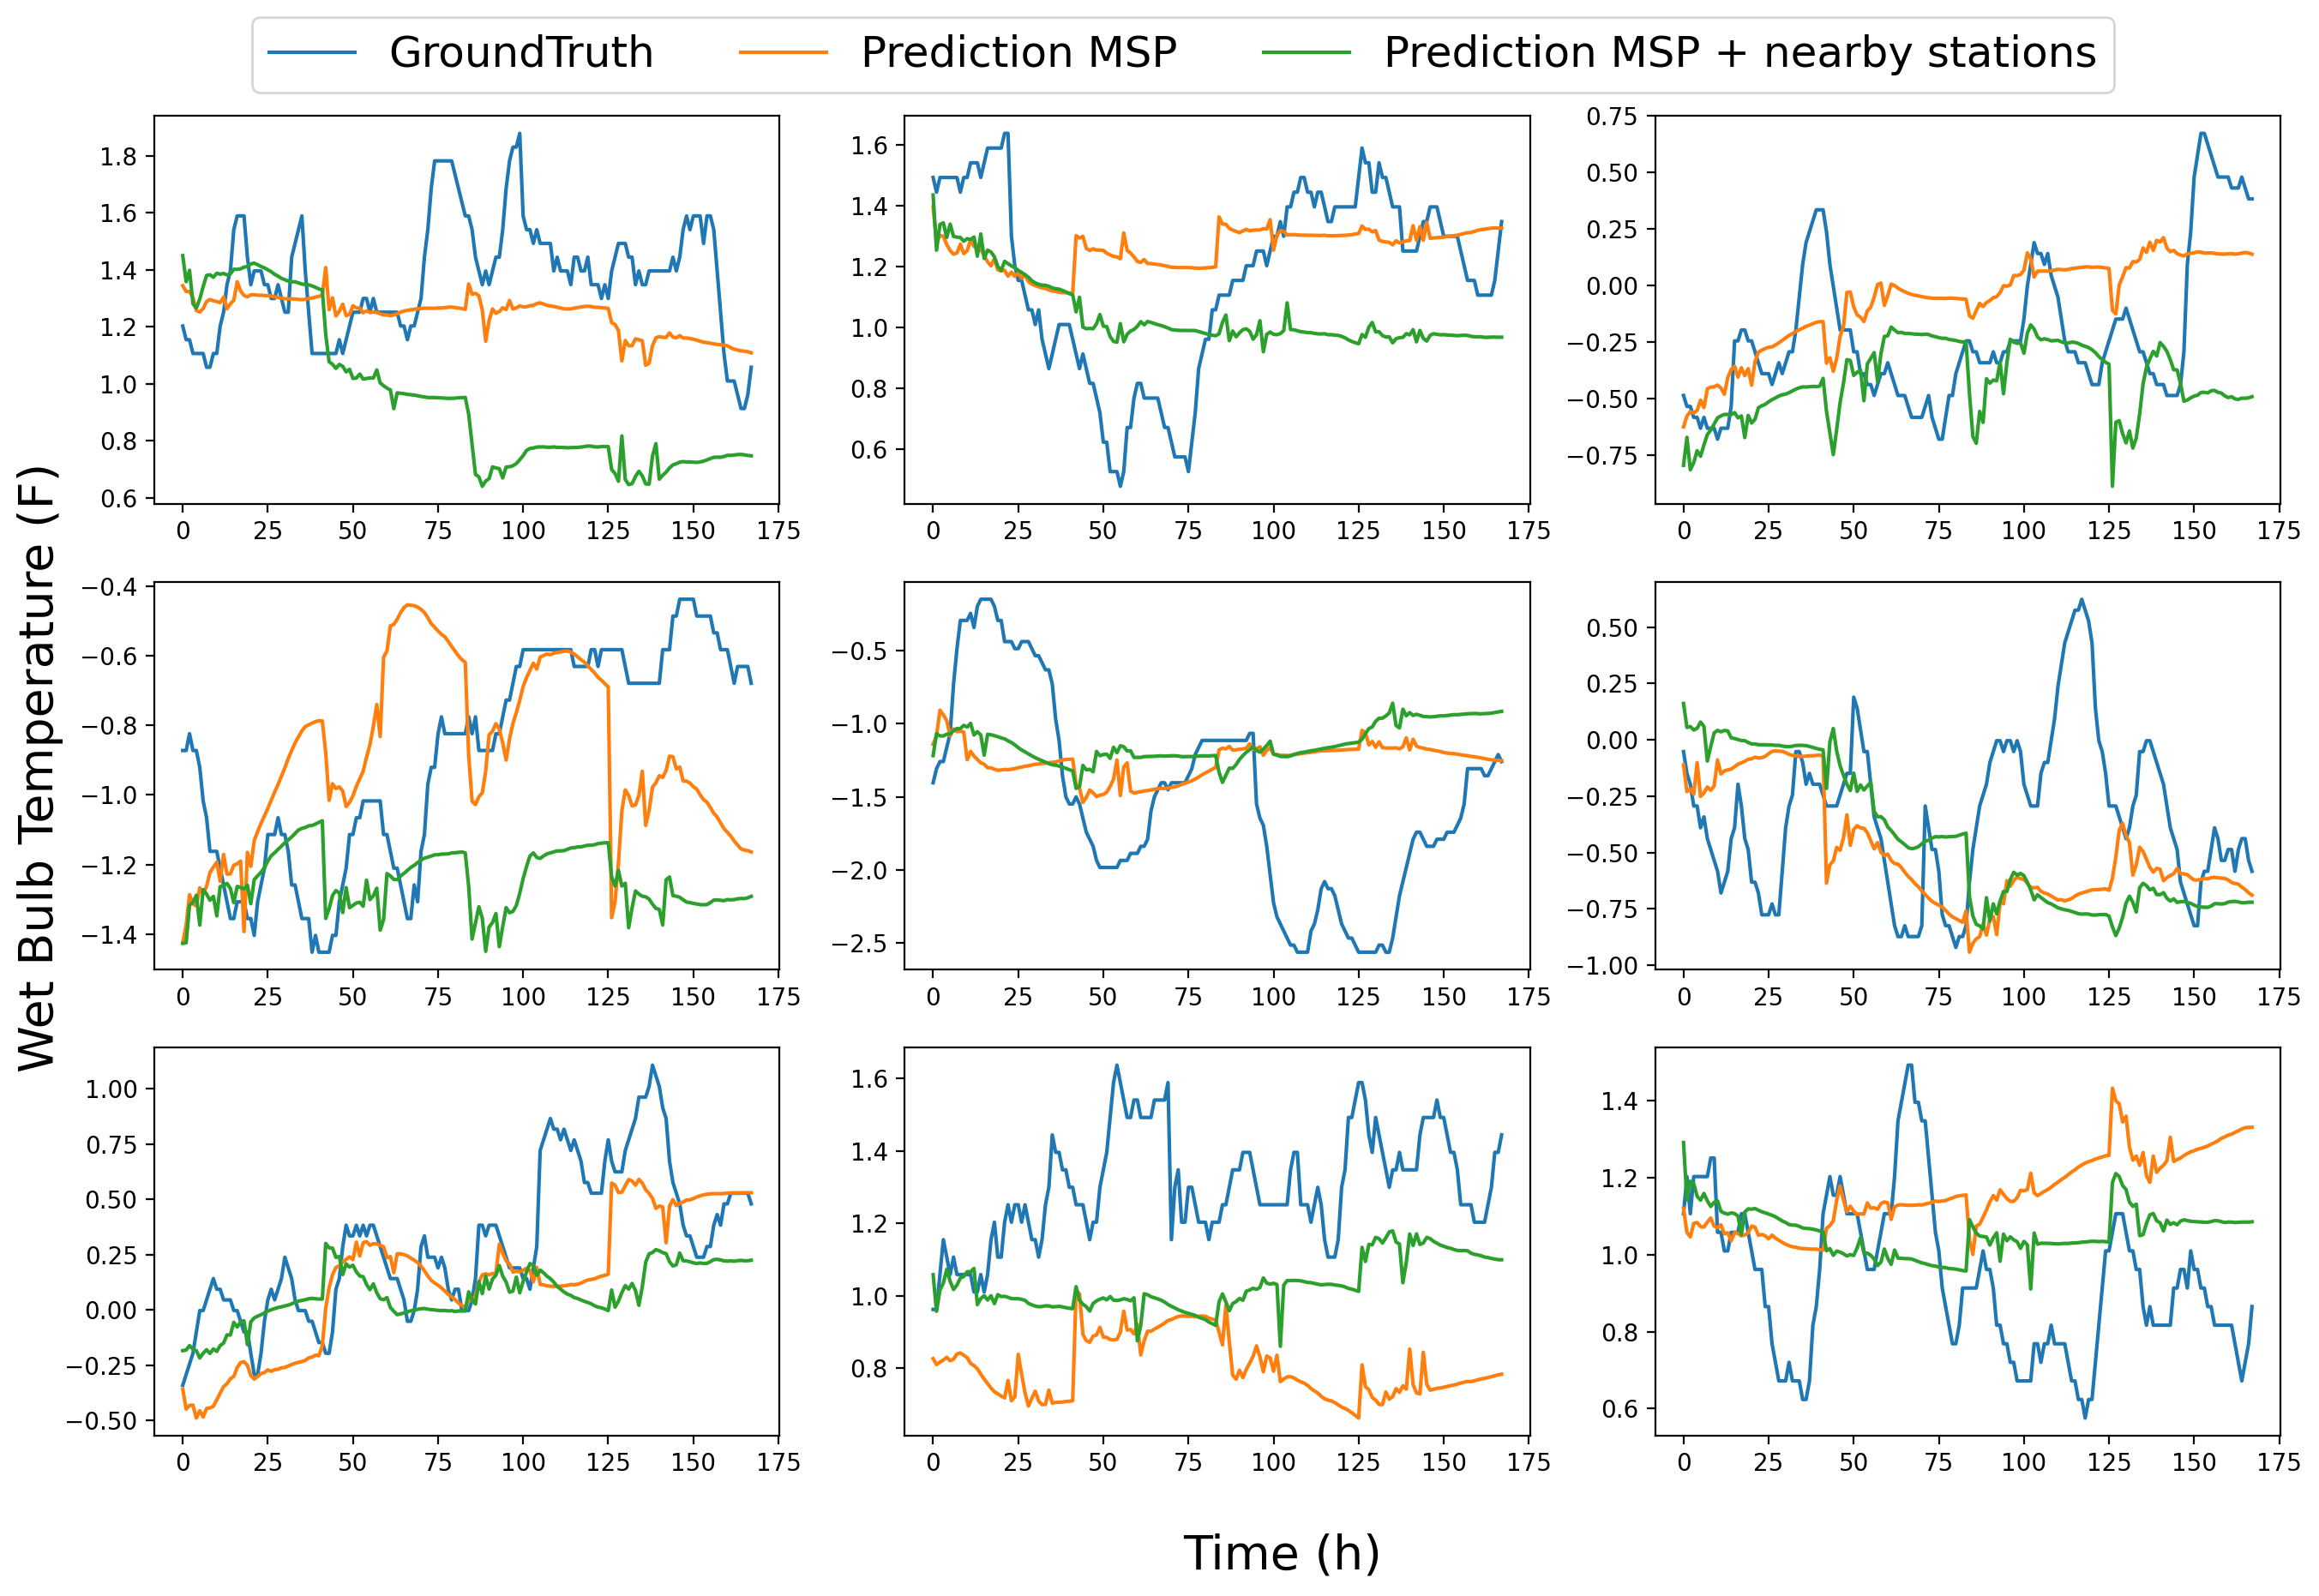

In [99]:
msp = "/content/drive/MyDrive/5527 project/msp_results/msp_same_timepoints_as_concat/results/MSP_sl336_ll168_pl168_wetbulb_MS"
msp_nearby = "/content/drive/MyDrive/5527 project/msp_results/nearby_concat/results/informer_custom_ftMS_sl336_ll168_pl168_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0"

preds_msp = np.load(f'{msp}/pred.npy')
preds_msp_nearby = np.load(f"{msp_nearby}/pred.npy")
trues = np.load(f'{msp}/true.npy')

print("msp metrics:")
msp_long = metric(preds_msp, trues)
print(msp_long)

print("msp nearby metrics:")
msp_nearby_long = metric(preds_msp_nearby, trues)
print(msp_nearby_long)

frame = 1

nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, dpi=200, figsize=(16, 10))

for i, example in enumerate(range(0, 9000, 1000)):
  ax = axs[i // ncols, i % ncols]
  ax.plot(trues[example: example + frame,:,-1].flatten(), label='GroundTruth')
  ax.plot(preds_msp[example:example + frame,:,-1].flatten(), label='Prediction MSP')
  ax.plot(preds_msp_nearby[example:example + frame,:,-1].flatten(), label='Prediction MSP + nearby stations')
  # ax.set_ylabel("Wetbulb Temperature")
  # ax.set_xlabel("Hours")
  # ax.legend()
  if i == 0:
    plt.figlegend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, 0.95), fontsize=18)

fig.text(0.075, 0.5, 'Wet Bulb Temperature (F)', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.04, 'Time (h)', va='center', rotation='horizontal', fontsize=20)

plt.savefig("/content/drive/MyDrive/5527 project/figures/long_term.pdf")
plt.show()

In [100]:
msp_long

{'MAE': 0.39998537,
 'MSE': 0.29479808,
 'RMSE': 0.54295313,
 'MAPE': 2.0021462,
 'MSPE': 162.70096}

In [101]:
df = pd.concat([
    pd.DataFrame(msp_short, index=["MSP Short"]).T,
    pd.DataFrame(msp_nearby_short, index=["MSP Short + nearby"]).T,
    pd.DataFrame(msp_long, index=["MSP Long"]).T,
    pd.DataFrame(msp_nearby_long, index=["MSP Long + nearby"]).T,
], axis=1)

In [102]:
df

,MSP Short,MSP Short + nearby,MSP Long,MSP Long + nearby
MAE,0.190803,0.193709,0.399985,0.392558
MSE,0.068179,0.069350,0.294798,0.283550
RMSE,0.261112,0.263343,0.542953,0.532494
MAPE,1.243781,1.151981,2.002146,2.094922
MSPE,62.269058,53.905064,162.700958,166.158234


In [106]:
metadata = pd.DataFrame([
    [96, 96, 336, 336],
     [48, 48, 168, 168],
    [24, 24, 168, 168]
], index=["Encoder Input Length", "Decoder Start Length", "Prediction Sequence Length"], columns=df.columns)

In [111]:
pd.concat([metadata, df], axis=0).to_csv("/content/drive/MyDrive/5527 project/code_outputs/table.csv", float_format='%.3f')